# ep_footprint demo 📓
This notebook walks through **all public functions** defined in `ep_footprint.py`, using the provided half‑hourly tower dataset (`US-UTE_HH_202406241430_202409251400.csv`).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os
import sys
sys.path.insert(0, os.path.abspath("../../src"))  # adjust path as needed
from fluxfootprints.ep_footprint import (
    Footprint,
    handle_footprint,
    kljun,
    kormann_meixner,
    hsieh,
)

pd.set_option('display.max_columns', None)


## 1  Load the tower data

In [2]:
data_path = Path('US-UTE_HH_202406241430_202409251400.csv')
df = pd.read_csv(data_path, parse_dates=['TIMESTAMP_START'])
df.head()

,datetime_start,TIMESTAMP_START,TIMESTAMP_END,CO2,CO2_SIGMA,H2O,H2O_SIGMA,FC,FC_SSITC_TEST,LE,LE_SSITC_TEST,ET,ET_SSITC_TEST,H,H_SSITC_TEST,G,SG,FETCH_MAX,FETCH_90,FETCH_55,FETCH_40,WD,WS,WS_MAX,USTAR,ZL,TAU,TAU_SSITC_TEST,MO_LENGTH,U,U_SIGMA,V,V_SIGMA,W,W_SIGMA,PA,TA_1_1_1,RH_1_1_1,T_DP_1_1_1,VPD,T_SONIC,T_SONIC_SIGMA,TS_1_1_1,SWC_1_1_1,ALB,NETRAD,SW_IN,SW_OUT,LW_IN,LW_OUT,P,file_no,TA_1_2_1,RH_1_2_1,T_DP_1_2_1,TA_1_3_1,RH_1_3_1,T_DP_1_3_1,TA_1_4_1,PBLH_F,TS_2_1_1,SWC_2_1_1
0,2024-06-24 14:30:00,2024-06-24 14:30:00,202406241500,427.0199,0.628133,17.26862,1.019290,0.069210,-9999.0,156.40850,-9999.0,0.231785,1,68.15252,-9999.0,74.80030,46.48377,20.10258,55.58670,28.58118,21.63193,83.82242,4.118659,11.398000,0.285427,-0.100068,-0.077432,-9999.0,-21.72663,3.943613,1.289412,0.0,1.243537,0.000000e+00,0.545749,83.32956,30.37961,32.53116,12.07391,28.36929,31.60110,0.780417,22.91248,-9999.0,30.47296,535.95570,901.6483,279.53160,404.7657,490.9268,0.0,2.0,29.95141,33.26877,12.052600,30.32464,33.45364,12.46181,30.06976,1665.4670,25.72815,22.44161
1,2024-06-24 15:00:00,2024-06-24 15:00:00,202406241530,425.9499,1.019297,15.18936,0.703052,0.285446,-9999.0,138.30920,-9999.0,0.204970,1,43.44571,-9999.0,-11.26564,-34.50821,19.01147,52.56938,27.02798,20.45655,84.50763,3.128728,8.115280,0.228795,-0.130162,-0.049767,-9999.0,-16.70326,2.949647,1.087555,0.0,1.085609,3.725290e-09,0.469072,83.30210,30.43124,28.59812,10.17519,30.22208,31.47819,0.612819,22.98583,-9999.0,31.01464,404.80660,711.1035,227.35550,407.2817,486.2231,0.0,2.0,30.02516,29.22197,10.155240,30.35956,29.77183,10.72635,30.13765,1765.9350,25.52736,22.41975
2,2024-06-24 15:30:00,2024-06-24 15:30:00,202406241600,426.4163,1.965228,14.87533,0.808026,1.081928,-9999.0,154.11530,-9999.0,0.228469,2,30.66234,-9999.0,-41.83331,-63.57699,24.54221,67.84465,34.89815,26.41252,98.68390,2.669845,6.715653,0.278461,-0.056014,-0.073625,1.0,-38.81393,2.517204,0.947462,0.0,0.901596,3.725290e-09,0.414893,83.27771,30.85518,27.38244,9.86806,31.03824,31.67058,0.754534,23.08474,-9999.0,29.70208,292.83510,546.4703,175.47960,408.3091,486.4648,0.0,2.0,30.24634,28.28498,9.838229,30.69433,28.63222,10.41335,30.40344,1495.7350,25.12511,22.32785
3,2024-06-24 16:00:00,2024-06-24 16:00:00,202406241630,426.0534,2.665907,15.61140,1.002919,0.519664,-9999.0,135.56180,-9999.0,0.201052,2,35.21790,-9999.0,-35.91724,-55.34350,25.22658,69.73144,35.87147,27.14916,99.19427,2.552504,7.758736,0.307955,-0.044854,-0.089869,-9999.0,-48.47143,2.415924,0.964258,0.0,0.830604,7.450581e-09,0.443330,83.25893,31.35262,27.86196,10.56774,31.70765,32.24849,0.740912,23.06612,-9999.0,31.21184,331.98800,619.2519,209.64340,410.9713,488.5918,0.0,2.0,30.75179,28.75255,10.538220,31.14621,29.16225,11.09066,30.90061,1491.0620,24.63557,22.18172
4,2024-06-24 16:30:00,2024-06-24 16:30:00,202406241700,427.8476,1.102921,15.21034,0.703084,1.147608,-9999.0,95.06287,-9999.0,0.140773,2,-13.31553,-9999.0,-56.61974,-71.74620,26.52178,74.34869,37.88823,28.65891,115.64840,1.786293,6.475121,0.301376,0.007892,-0.086520,-9999.0,275.48160,1.656280,0.800199,0.0,0.658542,-9.313226e-10,0.407538,83.24686,29.68962,29.89470,10.19186,28.14444,30.61350,0.546374,22.76160,-9999.0,28.93153,79.40314,209.7798,67.09201,404.4651,467.7497,0.0,2.0,29.16274,30.77158,10.165810,29.57434,30.96792,10.63069,29.30510,341.9711,24.14865,22.03216


## 2  Helper for one‑row footprint calculation
The tower CSV already contains all required micrometeorological inputs for the three analytic footprint models (`kljun`, `kormann_meixner`, `hsieh`).

In [ ]:
def calc_all_models(row):
    """Return Footprint objects from each analytic model for a single row."""
    # ---- Common inputs --------------------------------------------------- #
    var_w = row['W_SIGMA']               # vertical velocity variance (m² s⁻²)
    ustar = row['USTAR']                    # m s⁻¹
    zL = row['ZL']                         # stability parameter
    wind_speed = row['WS']          # m s⁻¹
    MO_length = row['MO_LENGTH']            # m
    sonic_height = 2           # m AGL
    disp_height = 0.5             # m
    rough_length = 0.5*.123                # m

    # ---- Dispatch helper -------------------------------------------------- #
    def _safe_call(func, *args, **kwargs):
        fp = func(*args, **kwargs)
        return fp if isinstance(fp, Footprint) else Footprint.error()

    out = {
        'kljun': _safe_call(
            kljun,
            std_w=var_w ** 0.5,
            ustar=ustar,
            zL=zL,
            sonic_height=sonic_height,
            disp_height=disp_height,
            rough_length=rough_length,
        ),
        'kormann_meixner': _safe_call(
            kormann_meixner,
            ustar=ustar,
            zL=zL,
            wind_speed=wind_speed,
            sonic_height=sonic_height,
            disp_height=disp_height,
        ),
        'hsieh': _safe_call(
            hsieh,
            MO_length=MO_length,
            sonic_height=sonic_height,
            disp_height=disp_height,
            rough_length=rough_length,
        ),
    }
    return out


### Run on the first half‑hour record

In [13]:
example = df.iloc[0]
fps = calc_all_models(example)
fps

{'kljun': Footprint(peak=np.float64(8.11185815749302), offset=np.float64(-1.2310057711486297), x10=np.float64(2.784538406112926), x30=np.float64(6.933894346547305), x50=np.float64(10.574626380929457), x70=np.float64(14.831063856362597), x80=np.float64(17.74899552950313), x90=np.float64(22.219636230509405)),
 'kormann_meixner': Footprint(peak=np.float64(20.25169388898962), offset=9.0, x10=16.0, x30=29.0, x50=45.0, x70=78.0, x80=113.0, x90=201.0),
 'hsieh': Footprint(peak=np.float64(6.007804350676168), offset=5.0, x10=10.0, x30=10.0, x50=20.0, x70=35.0, x80=55.0, x90=115.0)}

## 3  Compare modelled peak distances for one day

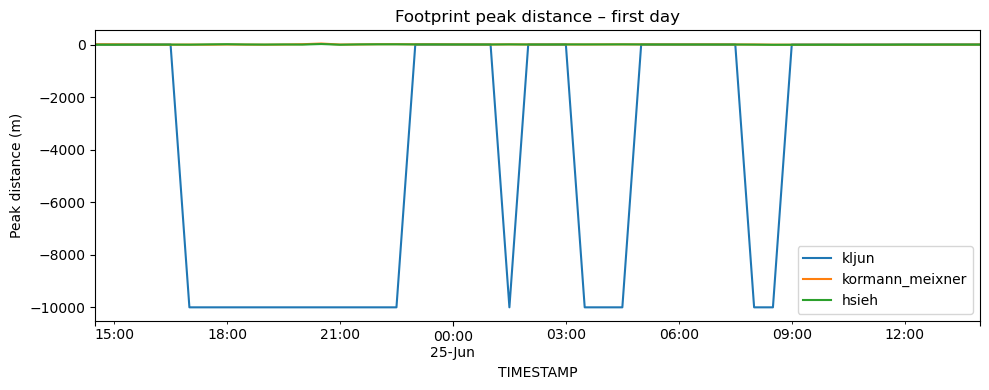

In [14]:
# subset first 48 half‑hours (one day)
sub = df.head(48).copy()
peaks = {'TIMESTAMP': sub['TIMESTAMP_START']}
for model in ['kljun', 'kormann_meixner', 'hsieh']:
    peaks[model] = []
for _, row in sub.iterrows():
    fps = calc_all_models(row)
    for model in peaks.keys():
        if model == 'TIMESTAMP':
            continue
        peaks[model].append(fps[model].peak)

peaks_df = pd.DataFrame(peaks)
peaks_df.set_index('TIMESTAMP').plot(figsize=(10, 4))
plt.ylabel('Peak distance (m)')
plt.title('Footprint peak distance – first day')
plt.tight_layout()

## 4  `handle_footprint` smart dispatcher

In [15]:
fp_dispatch = handle_footprint(
    var_w=example['W_SIGMA'],
    ustar=example['USTAR'],
    zL=example['ZL'],
    wind_speed=example['WS'],
    MO_length=example['MO_LENGTH'],
    sonic_height=2,
    disp_height=0.5,
    rough_length=0.5*.123,
    foot_model='kljun',
)
fp_dispatch

Footprint(peak=np.float64(11.276821782996958), offset=np.float64(-1.7113012118266668), x10=np.float64(3.8709680006720326), x30=np.float64(9.639257650963357), x50=np.float64(14.700476118331611), x70=np.float64(20.6176267771596), x80=np.float64(24.674033436905393), x90=np.float64(30.888961935684893))

### Next steps
- Apply the `calc_all_models` helper across your full dataset.
- Aggregate footprint distances or other percentiles for further analysis.
- Combine model outputs with land‑cover maps to examine source contributions.